In [1]:
import numpy as np # 1.19.5
import os
from sklearn.datasets import fetch_openml # 1.0.1
import matplotlib.pyplot as plt # 3.2.2

In [ ]:
"""
!python --version
Python 3.7.12
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
"""

In [2]:
mnist = fetch_openml('mnist_784',as_frame=False)
print(mnist['data'].shape, type(mnist['data']))

(70000, 784) <class 'numpy.ndarray'>


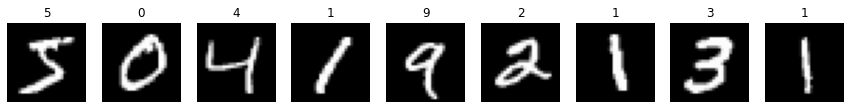

In [ ]:
fig = plt.figure(figsize=(15,3))
fig.patch.set_facecolor('white')
for i in range(9):
  plt.subplot(191+i)
  plt.imshow(mnist['data'][i].reshape(28,28),'gray')
  plt.title(mnist['target'][i])
  plt.axis('off')
#fig.savefig('/content/drive/MyDrive/110-1/DSP/test.jpg')

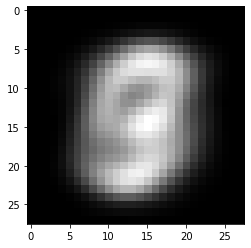

In [ ]:
# Q1 : show the mean of all 70k images

ds_mean = np.mean(mnist['data'],0)
fig = plt.figure()
plt.imshow(ds_mean.reshape(28,28),'gray')
#fig.savefig('/content/drive/MyDrive/110-1/DSP/Q1.jpg')

(784, 784)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


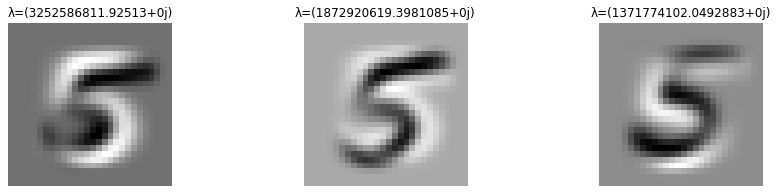

In [ ]:
# Q2 : Extract all the '5' images (6313 vectors).
# Use centered-PCA (5's center) to decompose.
# Show eigenvectors with the 3 largest eigenvalues.
# Show the corresponding eigenvalues as well.

lbl5 = np.where(mnist['target']=='5')
ds5 = mnist['data'][lbl5]

# compute center of '5'
ds5_mean = np.mean(ds5,0)
centered_ds5 = np.subtract(ds5, ds5_mean)

# process PCA
l,v = PCA(centered_ds5)

# add back the mean
img = np.add(v, ds5_mean)

# show subplot
fig = plt.figure(figsize=(15,3))
fig.patch.set_facecolor('white')

for i in range(3):
  plt.subplot(131+i)
  plt.imshow(img[:,i].astype('float64').reshape(28,28),'gray')
  plt.title('\u03BB='+str(l[i]))
  plt.axis('off')

#fig.savefig('/content/drive/MyDrive/110-1/DSP/Q2.jpg')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: ComplexWarning:

Casting complex values to real discards the imaginary part



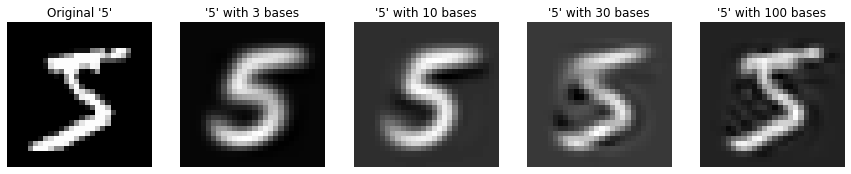

In [ ]:
# Q3 : Extract all the '5' images.
# Use centered PCA and the top {3,10,30,100} eigenvectors to reconstruct the first '5' image.
# Explain your result.

topList = np.array([3,10,30,100])

# compute center of '1,3,6'
ds5_mean = np.mean(ds5,0)
centered_ds5 = np.subtract(ds5, ds5_mean)

# get Top-k eigenvectors
l,v = PCA(centered_ds5)

# show subplot
fig = plt.figure(figsize=(15,3))
fig.patch.set_facecolor('white')

# plot Original first '5'
plt.subplot(151)
plt.imshow(ds5[0].reshape(28,28),'gray')
plt.title("Original \'5\'")
plt.axis('off')

# plot first '5' by [3,10,30,100] bases
for i in range(len(topList)):
  
  plt.subplot(152+i)
  
  # shifting x_i by minus mean
  img = np.subtract(ds5[0], ds5_mean)
  
  # compute Coef coresponding to limited-k bases
  coef = np.dot(v[:,0:topList[i]].T, img)
  
  # compute Reconstruct x_i
  img = np.dot(v[:,0:topList[i]], coef)
  
  # adding mean to x_i for visualization
  img = np.add(img, ds5_mean)

  plt.imshow(img.astype('float64').reshape(28,28),'gray')
  plt.title("\'5\' with "+str(topList[i])+" bases")
  plt.axis('off')

#fig.savefig('/content/drive/MyDrive/110-1/DSP/Q3.jpg')

In [3]:
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html 
def PCA(ds):
  
  # compute Scatter matrix
  S = np.dot(ds.T, ds)
  
  # get unsorted eigenvalues & eigenvectors
  l, v = np.linalg.eig(S)

  # sort eigenvalues & eigenvectors in descending order
  idx = l.argsort()[::-1]
  l_ = l[idx]
  v_ = v[:,idx]

  # return sorted eigenvalues (m,1) & eigenvectors[p1, p2, ..., pm] of size (n,m)
  return l_, v_

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning:

Casting complex values to real discards the imaginary part



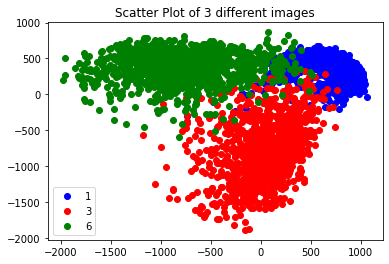

In [ ]:
# Q4 : Extract the first 10k images. Next, extract all the '1,3 and 6' (from 10k images).
# Use centered PCA to reduce the dimensions from 784 to 2 (the 2 largest eigenvalues).
# Plot those points in a 2-D plane using plt.scatter function with different colours.
# Explain your answer.

# extract dataset of '1,3'6'
choice = np.array([1,3,6])
lbl = np.where(mnist['target'][:10000]==str(choice[0]))
ds136 = mnist['data'][lbl]
lbl136 = mnist['target'][lbl]

for i in range(1,len(choice)):
  lbl = np.where(mnist['target'][:10000]==str(choice[i])) 
  ds136 = np.append(ds136, mnist['data'][lbl], axis=0)
  lbl136 = np.append(lbl136, mnist['target'][lbl], axis=0)


# compute center of '1,3,6'
ds136_mean = np.mean(ds136,0)
centered_ds136 = np.subtract(ds136, ds136_mean)

l, v = PCA(centered_ds136)

# compute Coef coresponding to limited-k bases
coef = np.dot(v[:,0:2].T, centered_ds136.T)

fig = plt.figure()

# show Scatter Plot , 1127, 2159, 3173
plt.scatter(coef[0][:1127], coef[1][:1127], c="blue", label="1")
plt.scatter(coef[0][1127:2159], coef[1][1127:2159], c="red", label="3")
plt.scatter(coef[0][2159:], coef[1][2159:], c="green", label="6")
plt.title("Scatter Plot of 3 different images")
plt.legend()
plt.show()

#fig.savefig('/content/drive/MyDrive/110-1/DSP/Q4.jpg')

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

X = ds136

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=lbl136)
fig.show()

In [4]:
def OMP(x, dictionary, sparsity): # dict(784,10k)
  
  r = x
  m = dictionary.shape[1]
  selected =[]
  Coef = np.zeros((m))
  temp = dictionary.copy()


  for l in range(sparsity):
    
    # select l-th basis (10k x 784) x (784 x 1) = (10k x 1)
    innerProduct = np.fabs(np.dot(temp.T, r)) # )
    max = np.argmax(innerProduct)
    selected.append(max)
    temp[:,max] = 0
    
    # compute Coefficient by pseudo-inverse Bt
    B = dictionary[:,selected[:]]
    Bt = np.linalg.pinv(B)
    coef = np.dot(Bt, x)
    r = r - np.dot(B, coef)

  Coef[selected[:]] = coef

  return selected, Coef

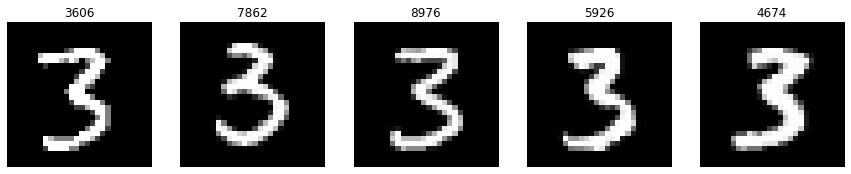

In [5]:
# Q5 : Find the 5 bases of the #10001 image ('3') with sparsity=5.
# Show the 5 bases.

ds_10k = mnist['data'][:10000,:] # (10k,784)
ds_10k = ds_10k.T # (784,10k)
norm = np.linalg.norm(ds_10k, axis=0, keepdims=True)
normed_ds_10k = np.divide(ds_10k, norm) # (784,10k)
#print(np.square(normed_ds_10k).sum(axis=0)) # [1. 1. 1. ... 1. 1. 1.]

sparsity = 5
m = normed_ds_10k.shape[1]
x = mnist['data'][m+0] # '3'

idx, coef = OMP(x, normed_ds_10k, sparsity)

fig = plt.figure(figsize=(15,3))
fig.patch.set_facecolor('white')

for i in range(len(idx)):
  plt.subplot(151+i)
  plt.imshow(mnist['data'][idx[i]].reshape(28,28),'gray') # normed_ds_10k.T
  plt.title(idx[i])
  plt.axis('off')

#fig.savefig("/content/drive/MyDrive/110-1/ DSP/Q5.jpg")

In [6]:
def l2norm(x, y):

  # x=(1,784), y=(784,1)
  diff = x.T - y
  diag = np.diag(diff)
  dist = np.sqrt(np.square(np.fabs(diag)).sum())
  return dist


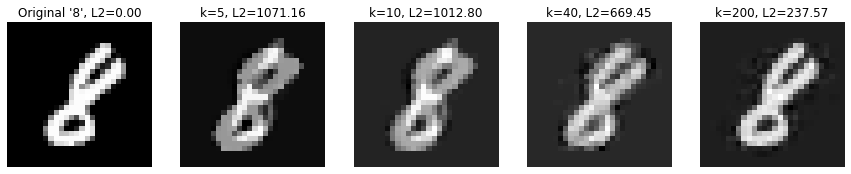

In [7]:
# Q6 : Find the bases of the #10002 image ('8') with sparsity={5,10,40,200}.
# Show the reconstruction images.
# Calculate their reconstruction errors using L2-norm (Euclidean distance).

ds_10k = mnist['data'][:10000,:]
ds_10k = ds_10k.T
norm = np.linalg.norm(ds_10k, axis=0, keepdims=True)
normed_ds_10k = np.divide(ds_10k, norm) # (784,10k)
#print(np.square(normed_ds_10k).sum(axis=0)) # [1. 1. 1. ... 1. 1. 1.]

sparsity = np.array([5,10,40,200])
m = normed_ds_10k.shape[1] # 10k
x = mnist['data'][m+1] # '8'

idx, Coef = OMP(x, normed_ds_10k, sparsity.max())

fig = plt.figure(figsize=(15,3))
fig.patch.set_facecolor('white')

plt.subplot(151)
plt.imshow(x.reshape(28,28),'gray')
dist = l2norm(x,x)
plt.title("Original \'8\'"+", L2="+"{:.2f}".format(dist))
plt.axis('off')

for s in range(len(sparsity)):
  
  B = normed_ds_10k[:,idx[:sparsity[s]]] # (784,l) print(B.shape)
  Bt = np.linalg.pinv(B)
  coef = np.dot(Bt, x)
  reconstruct = np.dot(B, coef)

  dist = l2norm(x,reconstruct)
  
  plt.subplot(152+s)
  plt.imshow(reconstruct.reshape(28,28),'gray')
  plt.title("k="+str(np.count_nonzero(coef))+", L2="+"{:.2f}".format(dist))
  plt.axis('off')
  
#fig.savefig("/content/drive/MyDrive/110-1/DSP/Q6.jpg")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5973.148303044941, tolerance: 825.9033709183701
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: ComplexWarning: Casting complex values to real discards the imaginary part


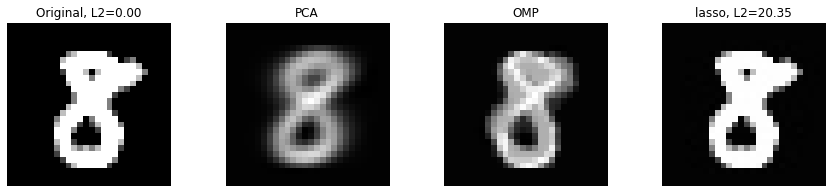

In [11]:
# Q7 : Extract all the '8' images from the dataset (6825 vectors).
# (1) ~ (3)

from sklearn.linear_model import Lasso, LassoCV

##### (1) Use centered-PCA to reconstruct the last '8'. (remain 5 largest eigenvalues)

# extract all '8' data
lbl8 = np.where(mnist['target']=='8')
ds8 = mnist['data'][lbl8]
#print(ds8.shape) #(6825,784)

# compute center of '8'
ds8_mean = np.mean(ds8,0)
centered_ds8 = np.subtract(ds8, ds8_mean)

# perform PCA
l,v = PCA(centered_ds8)

# get last '8'
x = centered_ds8[-1]
  
# compute Coef coresponding to limited-k bases
coef = np.dot(v[:,0:5].T, x)
  
# compute Reconstruct x_i
image8_PCA = np.dot(v[:,0:5], coef)
  
# adding mean to x_i for visualization
image8_PCA = np.add(image8_PCA, ds8_mean)

##### (2) Use the first 6824 images as the base set, Use OMP to find the bases (sparsity=5) and reconstruct the last '8'.

ds8_ = ds8[:-1].T #(784,6824)
norm = np.linalg.norm(ds8_, axis=0, keepdims=True)
normed_ds8_ = np.divide(ds8_, norm)
# print(np.square(normed_ds8_).sum(axis=0)) # [1. 1. 1. ... 1. 1. 1.]

# perform OMP
x = ds8[-1]
idx, coef = OMP(x, normed_ds8_, 5)
B = normed_ds8_[:,idx[:5]] # (784,5)
Bt = np.linalg.pinv(B)
c = np.dot(Bt, x)
image8_OMP = np.dot(B, c)

# show subplot
fig = plt.figure(figsize=(15,3))
fig.patch.set_facecolor('white')

##### (3) As (2), use lasso to find the bases and reconstruct the images.

lasso = Lasso()
A = ds8_ # (784,6824)
At = np.linalg.pinv(A) # (6824,784)
x = ds8[-1]
c = np.dot(A, np.dot(At, x)) # (784,6824)*(6824,784)*(784,1) = (784,1)
lasso.fit(A, c)
image8_lasso = np.dot(A,lasso.coef_)

###### Show subplots of 3 algorithms ######

# show Original image
plt.subplot(141)
plt.imshow(x.reshape(28,28),'gray')
plt.title('Original, L2='+'{:.2f}'.format(l2norm(x,x)))
plt.axis('off')

# show reconstruct image by PCA
plt.subplot(142)
plt.imshow(image8_PCA.astype('float64').reshape(28,28),'gray')
plt.title('PCA')#, L2='+'{:.2f}'.format(l2norm(x,image8_PCA)))
plt.axis('off')

# show reconstruct image by OMP
plt.subplot(143)
plt.imshow(image8_OMP.astype('float64').reshape(28,28),'gray')
plt.title('OMP')# , L2='+'{:.2f}'.format(l2norm(x,image8_OMP)))
plt.axis('off')

# show reconstruct image by lasso
plt.subplot(144)
plt.imshow(image8_lasso.reshape(28,28).reshape(28,28),'gray')
plt.title('lasso, L2='+'{:.2f}'.format(l2norm(x,image8_lasso)))
plt.axis('off')

fig.savefig("/content/drive/MyDrive/110-1/DSP/Q7.jpg")

In [ ]:
print(np.sum(lasso.coef_!=0))

920


In [ ]:
import pandas as pd

data = pd.DataFrame()
cols = ["100","10","1","0.1","0.01","0.001"]
dic_error = {}
dic_coef = {}

In [ ]:
# Q7-4
##### (4) Adjust the lasso parameters. Explain your experiments and results.

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# either One is True
no_flag = False#True
z_flag = True#False
c_flag = False

### no pre-processing
if (no_flag):
  A = ds8_ # (784,6824) ds8_ = ds8[:-1].T
  x = ds8[-1]
### z-score pre-processing ###
elif (z_flag):
  scaler = StandardScaler()
  #x = ds8[-1].T
  A = scaler.fit_transform(ds8.T) # (784,6825) 
  x = A[:,-1]
  A = A[:,:-1] # (784,6824)
  #x_mean = np.mean(x)
  #x_std = np.std(x)
  #x = np.divide(np.subtract(x,x_mean),x_std)
### centered
elif (c_flag):
  A = centered_ds8[:-1,:].T
  x = centered_ds8[-1,:]

At = np.linalg.pinv(A) # (6824,784)
c = np.dot(A, np.dot(At, x)) 
print(A.shape, c.shape, x.shape)

(784, 6824) (784,) (784,)


In [ ]:
scaler.mean_.shape

(6825,)

In [ ]:
from sklearn.linear_model import Lasso, LassoCV
# no pre-processing
# z-score
# centered
# 3 * 6 alpha = 18
# compute l2norm & np.sum(lasso.coef_!=0)

image = np.zeros((6,784))
error = np.zeros(6)
coef_count = np.zeros(6)
alphas = [100, 10, 1, 0.1, 0.01, 0.001]

for i in range(len(alphas)):
  model = Lasso(alpha=alphas[i]).fit(A,c)
  image[i,:] = np.dot(A,model.coef_)
  #if(z_flag):
    #x_mean = np.mean(x)
    #x_std = np.std(x)
    #image[i,:] = np.add(np.multiply(image[i],x_std),x_mean)
  if(c_flag):
    image[i,:] = np.add(image[i], ds8_mean)
  error[i] = l2norm(x,image[i])
  coef_count[i] = np.sum(model.coef_!=0)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15973.900341454137, tolerance: 825.9033709183632
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12654.123313784818, tolerance: 825.9033709183632
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4941.772067630627, tolerance: 825.9033709183632
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1286.38391

In [ ]:
l2norm(ds8[-1].T,np.add(np.multiply(image[0],x_std),x_mean))

166202.49197397736

In [ ]:
if (no_flag):
  print("no pre-processing")
  print(error)
  print(coef_count)
  for i in range(len(cols)):
    dic_error[cols[i]] = error[i]
    dic_coef[cols[i]] = coef_count[i]
  data = data.append(dic_error,ignore_index=True)
  data = data.append(dic_coef,ignore_index=True)
  print(data)


no pre-processing
[497.16346014 127.23695674  20.34507834   3.80701104   4.72538628
   4.98215514]
[ 100.  333.  920. 2743. 6661. 6824.]
         0.001         0.01          0.1           1          10        100
0     4.982155     4.725386     3.807011   20.345078  127.236957  497.16346
1  6824.000000  6661.000000  2743.000000  920.000000  333.000000  100.00000


In [ ]:
if (z_flag):
  print("z-score")
  print(error)
  print(coef_count)
  for i in range(len(cols)):
    dic_error[cols[i]] = error[i]
    dic_coef[cols[i]] = coef_count[i]
  data = data.append(dic_error,ignore_index=True)
  data = data.append(dic_coef,ignore_index=True)
  print(data)

z-score
[  2873.85345994 248564.80389965 282462.2567455  290411.99606719
 291917.61461174 292073.25805698]
[   0.   26.  118.  370. 1007. 3004.]
           0.001           0.01  ...             10         100
0       4.982155       4.725386  ...     127.236957   497.16346
1    6824.000000    6661.000000  ...     333.000000   100.00000
2       1.080250       4.307277  ...      28.000000    28.00000
3     365.000000     119.000000  ...       0.000000     0.00000
4  292073.258057  291917.614612  ...  248564.803900  2873.85346
5    3004.000000    1007.000000  ...      26.000000     0.00000

[6 rows x 6 columns]


In [ ]:
data

,0.001,0.01,0.1,1,10,100
0,4.982155,4.725386,3.807011,20.345078,127.236957,497.16346
1,6824.000000,6661.000000,2743.000000,920.000000,333.000000,100.00000
2,1.080250,4.307277,8.056076,28.000000,28.000000,28.00000
3,365.000000,119.000000,25.000000,0.000000,0.000000,0.00000
4,292073.258057,291917.614612,290411.996067,282462.256746,248564.803900,2873.85346
5,3004.000000,1007.000000,370.000000,118.000000,26.000000,0.00000


(-0.5, 27.5, 27.5, -0.5)

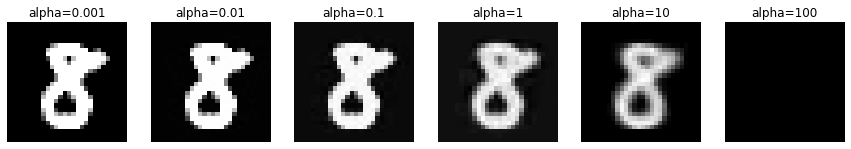

In [ ]:
# show subplot
fig = plt.figure(figsize=(15,3))
fig.patch.set_facecolor('white')

plt.subplot(166)
plt.imshow(image[0].reshape(28,28),'gray')
plt.title("alpha="+str(alphas[0]))
plt.axis('off')

plt.subplot(165)
plt.imshow(image[1].reshape(28,28),'gray')
plt.title("alpha="+str(alphas[1]))
plt.axis('off')

plt.subplot(164)
plt.imshow(image[2].reshape(28,28),'gray')
plt.title("alpha="+str(alphas[2]))
plt.axis('off')

plt.subplot(163)
plt.imshow(image[3].reshape(28,28),'gray')
plt.title("alpha="+str(alphas[3]))
plt.axis('off')

plt.subplot(162)
plt.imshow(image[4].reshape(28,28),'gray')
plt.title("alpha="+str(alphas[4]))
plt.axis('off')

plt.subplot(161)
plt.imshow(image[5].reshape(28,28),'gray')
plt.title("alpha="+str(alphas[5]))
plt.axis('off')